In [ ]:
/Users/vidushi/PycharmProjects/Data_visualization/Testing_File/Data_mapping

In [1]:
import pandas as pd

In [ ]:
df_pd= pd.read_csv(<csv path>)

/var/folders/g7/69ythtfj5v731v_q35bsybm00000gn/T/ipykernel_1217/4209817803.py:1: DtypeWarning: Columns (34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/Users/vidushi/Documents/Datasets/DW/finance.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10881634 entries, 0 to 10881633
Data columns (total 46 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   STRUCTURE                      object 
 1   STRUCTURE_ID                   object 
 2   STRUCTURE_NAME                 object 
 3   ACTION                         object 
 4   REF_AREA                       object 
 5   Reference area                 object 
 6   FREQ                           object 
 7   Frequency of observation       object 
 8   MEASURE                        object 
 9   Measure                        object 
 10  UNIT_MEASURE                   object 
 11  Unit of measure                object 
 12  FINANCING_SCHEME               object 
 13  Financing scheme               object 
 14  FINANCING_SCHEME_REV           object 
 15  Revenues of financing schemes  object 
 16  FUNCTION                       object 
 17  Health function                object 
 18  

In [7]:
missing = df.isnull().sum()
missing = missing[missing > 0]  
print(missing.sort_values(ascending=False))


Time period             10881634
Observation value       10881634
Base period             10881634
OBS_STATUS3             10881349
Observation status 3    10881349
OBS_STATUS2             10871606
Observation status 2    10871606
CURRENCY                10559443
Currency                10559443
OBS_STATUS              10141804
Observation status      10141804
BASE_PER                 6978582
TIME_PERIOD                14791
OBS_VALUE                  14791
dtype: int64


In [8]:
!pip install pyspark



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [11]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("TestApp").getOrCreate()
print(spark.version)


25/04/17 13:12:47 WARN Utils: Your hostname, vidushis-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.0.0.110 instead (on interface en0)
25/04/17 13:12:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/17 13:12:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


3.5.5


In [12]:
file_path = "/Users/vidushi/Documents/Datasets/DW/org_project/finance.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)
display(df)

DataFrame[STRUCTURE: string, STRUCTURE_ID: string, STRUCTURE_NAME: string, ACTION: string, REF_AREA: string, Reference area: string, FREQ: string, Frequency of observation: string, MEASURE8: string, Measure9: string, UNIT_MEASURE: string, Unit of measure: string, FINANCING_SCHEME: string, Financing scheme: string, FINANCING_SCHEME_REV: string, Revenues of financing schemes: string, FUNCTION: string, Health function: string, MODE_PROVISION: string, Mode of provision: string, PROVIDER: string, Health care provider: string, FACTOR_PROVISION: string, Factor of provision: string, ASSET_TYPE: string, Asset type: string, PRICE_BASE: string, Price base: string, TIME_PERIOD: int, Time period: string, OBS_VALUE: double, Observation value: string, BASE_PER: int, Base period: string, CURRENCY34: string, Currency35: string, OBS_STATUS: string, Observation status: string, OBS_STATUS2: string, Observation status 2: string, OBS_STATUS3: string, Observation status 3: string, UNIT_MULT: int, Unit multip

In [13]:
df.show()

+---------+--------------------+--------------------+------+--------+--------------+----+------------------------+----------+-----------+------------+--------------------+----------------+--------------------+--------------------+-----------------------------+--------+--------------------+--------------+-----------------+--------+--------------------+----------------+-------------------+----------+--------------+----------+--------------+-----------+-----------+---------+-----------------+--------+-----------+----------+----------+----------+------------------+-----------+--------------------+-----------+--------------------+---------+---------------+----------+----------+
|STRUCTURE|        STRUCTURE_ID|      STRUCTURE_NAME|ACTION|REF_AREA|Reference area|FREQ|Frequency of observation|  MEASURE8|   Measure9|UNIT_MEASURE|     Unit of measure|FINANCING_SCHEME|    Financing scheme|FINANCING_SCHEME_REV|Revenues of financing schemes|FUNCTION|     Health function|MODE_PROVISION|Mode of provi

25/04/17 13:16:24 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
25/04/17 13:16:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: STRUCTURE, STRUCTURE_ID, STRUCTURE_NAME, ACTION, REF_AREA, Reference area, FREQ, Frequency of observation, MEASURE, Measure, UNIT_MEASURE, Unit of measure, FINANCING_SCHEME, Financing scheme, FINANCING_SCHEME_REV, Revenues of financing schemes, FUNCTION, Health function, MODE_PROVISION, Mode of provision, PROVIDER, Health care provider, FACTOR_PROVISION, Factor of provision, ASSET_TYPE, Asset type, PRICE_BASE, Price base, TIME_PERIOD, Time period, OBS_VALUE, Observation value, BASE_PER, Base period, CURRENCY, Currency, OBS_STATUS, Observation status, OBS_STATUS2, Observation status 2, OBS_STATUS3, Observation status 3, UNIT_MULT, Unit multiplier, DECIMALS, Decimals
 Schema: STRUCTURE, STRUCTURE_ID, STRUCTURE_

In [16]:
df.createOrReplaceTempView("data")

In [17]:
df_tb=spark.sql("select * from data")

In [22]:
from IPython.display import display


# enable a Spark configuration that allows DataFrames to be rendered as HTML tables in Jupyter, similar to Pandas

In [25]:
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)


In [28]:
df

25/04/17 13:26:21 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: STRUCTURE, STRUCTURE_ID, STRUCTURE_NAME, ACTION, REF_AREA, Reference area, FREQ, Frequency of observation, MEASURE, Measure, UNIT_MEASURE, Unit of measure, FINANCING_SCHEME, Financing scheme, FINANCING_SCHEME_REV, Revenues of financing schemes, FUNCTION, Health function, MODE_PROVISION, Mode of provision, PROVIDER, Health care provider, FACTOR_PROVISION, Factor of provision, ASSET_TYPE, Asset type, PRICE_BASE, Price base, TIME_PERIOD, Time period, OBS_VALUE, Observation value, BASE_PER, Base period, CURRENCY, Currency, OBS_STATUS, Observation status, OBS_STATUS2, Observation status 2, OBS_STATUS3, Observation status 3, UNIT_MULT, Unit multiplier, DECIMALS, Decimals
 Schema: STRUCTURE, STRUCTURE_ID, STRUCTURE_NAME, ACTION, REF_AREA, Reference area, FREQ, Frequency of observation, MEASURE8, Measure9, UNIT_MEASURE, Unit of measure, FINANCING_SCHEME, Financing scheme, FINANCING_SCHEME_REV, Revenues

STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE8,Measure9,UNIT_MEASURE,Unit of measure,FINANCING_SCHEME,Financing scheme,FINANCING_SCHEME_REV,Revenues of financing schemes,FUNCTION,Health function,MODE_PROVISION,Mode of provision,PROVIDER,Health care provider,FACTOR_PROVISION,Factor of provision,ASSET_TYPE,Asset type,PRICE_BASE,Price base,TIME_PERIOD,Time period,OBS_VALUE,Observation value,BASE_PER,Base period,CURRENCY34,Currency35,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier,DECIMALS44,Decimals45
DATAFLOW,OECD.ELS.HD:DSD_S...,Health expenditur...,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP c...",HF32,Cost-sharing with...,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2020,NULL,2.064,NULL,NULL,NULL,NULL,NULL,D,Definition differs,NULL,NULL,NULL,NULL,6,Millions,1,One
DATAFLOW,OECD.ELS.HD:DSD_S...,Health expenditur...,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP c...",HF32,Cost-sharing with...,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2019,NULL,2.104,NULL,NULL,NULL,NULL,NULL,D,Definition differs,NULL,NULL,NULL,NULL,6,Millions,1,One
DATAFLOW,OECD.ELS.HD:DSD_S...,Health expenditur...,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP c...",HF32,Cost-sharing with...,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2018,NULL,1.875,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,6,Millions,1,One
DATAFLOW,OECD.ELS.HD:DSD_S...,Health expenditur...,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP c...",HF32,Cost-sharing with...,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2017,NULL,1.901,NULL,NULL,NULL,NULL,NULL,D,Definition differs,NULL,NULL,NULL,NULL,6,Millions,1,One
DATAFLOW,OECD.ELS.HD:DSD_S...,Health expenditur...,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP c...",HF32,Cost-sharing with...,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2016,NULL,2.08,NULL,NULL,NULL,NULL,NULL,D,Definition differs,NULL,NULL,NULL,NULL,6,Millions,1,One
DATAFLOW,OECD.ELS.HD:DSD_S...,Health expenditur...,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP c...",HF32,Cost-sharing with...,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2022,NULL,2.646,NULL,NULL,NULL,NULL,NULL,D,Definition differs,NULL,NULL,NULL,NULL,6,Millions,1,One
DATAFLOW,OECD.ELS.HD:DSD_S...,Health expenditur...,I,LTU,Lithuania,A,Annual,EXP_HEALTH,Expenditure,PT_B1GQ,Percentage of GDP,HF3,Household out-of-...,_Z,Not application,HC43,Patient transport...,_T,Total,_T,Total,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2020,NULL,0.001,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,0,Units,1,One
DATAFLOW,OECD.ELS.HD:DSD_S...,Health expenditur...,I,LTU,Lithuania,A,Annual,EXP_HEALTH,Expenditure,PT_B1GQ,Percentage of GDP,HF3,Household out-of-...,_Z,Not application,HC43,Patient transport...,_T,Total,_T,Total,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2019,NULL,0.001,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,0,Units,1,One
DATAFLOW,OECD.ELS.HD:DSD_S...,Health expenditur...,I,LTU,Lithuania,A,Annual,EXP_HEALTH,Expenditure,PT_B1GQ,Percentage of GDP,HF3,Household out-of-...,_Z,Not application,HC43,Patient transport...,_T,Total,_T,Total,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2007,NULL,0.002,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,0,Units,1,One
DATAFLOW,OECD.ELS.HD:DSD_S...,Health expenditur...,I,LT

# Check missing data

In [31]:
from pyspark.sql.functions import col, isnan, when, count

missing_Df= df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns]).show()


25/04/17 13:36:42 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: STRUCTURE, STRUCTURE_ID, STRUCTURE_NAME, ACTION, REF_AREA, Reference area, FREQ, Frequency of observation, MEASURE, Measure, UNIT_MEASURE, Unit of measure, FINANCING_SCHEME, Financing scheme, FINANCING_SCHEME_REV, Revenues of financing schemes, FUNCTION, Health function, MODE_PROVISION, Mode of provision, PROVIDER, Health care provider, FACTOR_PROVISION, Factor of provision, ASSET_TYPE, Asset type, PRICE_BASE, Price base, TIME_PERIOD, Time period, OBS_VALUE, Observation value, BASE_PER, Base period, CURRENCY, Currency, OBS_STATUS, Observation status, OBS_STATUS2, Observation status 2, OBS_STATUS3, Observation status 3, UNIT_MULT, Unit multiplier, DECIMALS, Decimals
 Schema: STRUCTURE, STRUCTURE_ID, STRUCTURE_NAME, ACTION, REF_AREA, Reference area, FREQ, Frequency of observation, MEASURE8, Measure9, UNIT_MEASURE, Unit of measure, FINANCING_SCHEME, Financing scheme, FINANCING_SCHEME_REV, Revenues

+---------+------------+--------------+------+--------+--------------+----+------------------------+--------+--------+------------+---------------+----------------+----------------+--------------------+-----------------------------+--------+---------------+--------------+-----------------+--------+--------------------+----------------+-------------------+----------+----------+----------+----------+-----------+-----------+---------+-----------------+--------+-----------+----------+----------+----------+------------------+-----------+--------------------+-----------+--------------------+---------+---------------+----------+----------+
|STRUCTURE|STRUCTURE_ID|STRUCTURE_NAME|ACTION|REF_AREA|Reference area|FREQ|Frequency of observation|MEASURE8|Measure9|UNIT_MEASURE|Unit of measure|FINANCING_SCHEME|Financing scheme|FINANCING_SCHEME_REV|Revenues of financing schemes|FUNCTION|Health function|MODE_PROVISION|Mode of provision|PROVIDER|Health care provider|FACTOR_PROVISION|Factor of provision|AS

# data cleaning

In [14]:
missing_df= df.isnull()

In [17]:
missing_df.head(3)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False


# Show all columns in DataFrame output without truncation


In [19]:

pd.set_option('display.max_columns', None)        # Show all columns
pd.set_option('display.width', None)              # Auto-detect the display width
pd.set_option('display.max_colwidth', None)       # Show full content in each column (for long text)


In [ ]:
cols_with_null = df.columns[df.isnull().any()]
df_with_nulls = df[cols_with_null]
df_with_nulls.head()


,TIME_PERIOD,Time period,OBS_VALUE,Observation value,BASE_PER,Base period,CURRENCY,Currency,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3
0,2020.0,NaN,2.064,NaN,NaN,NaN,NaN,NaN,D,Definition differs,NaN,NaN,NaN,NaN
1,2019.0,NaN,2.104,NaN,NaN,NaN,NaN,NaN,D,Definition differs,NaN,NaN,NaN,NaN
2,2018.0,NaN,1.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017.0,NaN,1.901,NaN,NaN,NaN,NaN,NaN,D,Definition differs,NaN,NaN,NaN,NaN
4,2016.0,NaN,2.080,NaN,NaN,NaN,NaN,NaN,D,Definition differs,NaN,NaN,NaN,NaN


In [16]:
missing = missing_df.sum()
missing = missing[missing > 0]  
print(missing.sort_values(ascending=False))

Time period             10881634
Observation value       10881634
Base period             10881634
OBS_STATUS3             10881349
Observation status 3    10881349
OBS_STATUS2             10871606
Observation status 2    10871606
CURRENCY                10559443
Currency                10559443
OBS_STATUS              10141804
Observation status      10141804
BASE_PER                 6978582
TIME_PERIOD                14791
OBS_VALUE                  14791
dtype: int64


In [9]:
missing_percent = (missing / len(df)) * 100
print(missing_percent.sort_values(ascending=False).round(2))


Time period             100.00
Observation value       100.00
Base period             100.00
OBS_STATUS3             100.00
Observation status 3    100.00
OBS_STATUS2              99.91
Observation status 2     99.91
CURRENCY                 97.04
Currency                 97.04
OBS_STATUS               93.20
Observation status       93.20
BASE_PER                 64.13
TIME_PERIOD               0.14
OBS_VALUE                 0.14
dtype: float64


# Drop these columns from your DataFrame

In [22]:
cols_to_drop = [
    'Time period',
    'Observation value',
    'Base period',
    'OBS_STATUS3',
    'Observation status 3',
    'OBS_STATUS2',
    'Observation status 2',
    'CURRENCY',
    'Currency',
    'OBS_STATUS',
    'Observation status',
    'BASE_PER'
]


df_cleaned = df.drop(columns=cols_to_drop, errors='ignore')

# Display the cleaned DataFrame
df_cleaned.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,UNIT_MEASURE,Unit of measure,FINANCING_SCHEME,Financing scheme,FINANCING_SCHEME_REV,Revenues of financing schemes,FUNCTION,Health function,MODE_PROVISION,Mode of provision,PROVIDER,Health care provider,FACTOR_PROVISION,Factor of provision,ASSET_TYPE,Asset type,PRICE_BASE,Price base,TIME_PERIOD,OBS_VALUE,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP converted",HF32,Cost-sharing with third-party payers,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2020.0,2.064,6,Millions,1,One
1,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP converted",HF32,Cost-sharing with third-party payers,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2019.0,2.104,6,Millions,1,One
2,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP converted",HF32,Cost-sharing with third-party payers,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2018.0,1.875,6,Millions,1,One
3,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP converted",HF32,Cost-sharing with third-party payers,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2017.0,1.901,6,Millions,1,One
4,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP converted",HF32,Cost-sharing with third-party payers,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2016.0,2.080,6,Millions,1,One


# Drop rows where TIME_PERIOD or OBS_VALUE is null


In [23]:
df_cleaned = df_cleaned.dropna(subset=['TIME_PERIOD', 'OBS_VALUE'])
df_cleaned.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,UNIT_MEASURE,Unit of measure,FINANCING_SCHEME,Financing scheme,FINANCING_SCHEME_REV,Revenues of financing schemes,FUNCTION,Health function,MODE_PROVISION,Mode of provision,PROVIDER,Health care provider,FACTOR_PROVISION,Factor of provision,ASSET_TYPE,Asset type,PRICE_BASE,Price base,TIME_PERIOD,OBS_VALUE,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP converted",HF32,Cost-sharing with third-party payers,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2020.0,2.064,6,Millions,1,One
1,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP converted",HF32,Cost-sharing with third-party payers,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2019.0,2.104,6,Millions,1,One
2,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP converted",HF32,Cost-sharing with third-party payers,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2018.0,1.875,6,Millions,1,One
3,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP converted",HF32,Cost-sharing with third-party payers,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2017.0,1.901,6,Millions,1,One
4,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUT,Austria,A,Annual,EXP_HEALTH,Expenditure,USD_PPP,"US dollars, PPP converted",HF32,Cost-sharing with third-party payers,_Z,Not application,HC139,Other curative care,HBOUT,Outpatient,_T,Total,_Z,Not applicable,_Z,Not applicable,V,Current prices,2016.0,2.080,6,Millions,1,One


In [ ]:
df_cleaned.to_csv(<clean csv path>)

# UDF for missing stats

In [43]:
def missing_percentage(input_df):
    import pandas as pd
    missing_counts = input_df.isnull().sum()
    missing_percent = (missing_counts / len(input_df)) * 100
    non_missing_counts = len(input_df) - missing_counts
    stats_df = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage (%)': missing_percent.round(2),
        'Non-Missing Count': non_missing_counts
    })
    cols_with_null = stats_df[stats_df['Missing Count'] > 0].index.tolist()
    df_with_any_null = input_df[input_df[cols_with_null].isnull().any(axis=1)]

    return stats_df, df_with_any_null


# Data cleaning for revenue health financing schems

In [ ]:
REVENUE_HFS = pd.read_csv(<csv REVENUE_HFS>)
stats_df, df_with_any_null = missing_percentage(REVENUE_HFS)

In [45]:
stats_df

,Missing Count,Missing Percentage (%),Non-Missing Count
STRUCTURE,0,0.00,570
STRUCTURE_ID,0,0.00,570
STRUCTURE_NAME,0,0.00,570
ACTION,0,0.00,570
REF_AREA,0,0.00,570
Reference area,0,0.00,570
FREQ,0,0.00,570
Frequency of observation,0,0.00,570
MEASURE,0,0.00,570
Measure,0,0.00,570


In [46]:
df_with_any_null

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,UNIT_MEASURE,Unit of measure,FINANCING_SCHEME,Financing scheme,FINANCING_SCHEME_REV,Revenues of financing schemes,FUNCTION,Health function,MODE_PROVISION,Mode of provision,PROVIDER,Health care provider,FACTOR_PROVISION,Factor of provision,ASSET_TYPE,Asset type,PRICE_BASE,Price base,TIME_PERIOD,Time period,OBS_VALUE,Observation value,BASE_PER,Base period,CURRENCY,Currency,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0),Revenues of healthcare financing schemes,I,JPN,Japan,A,Annual,REVENUE,Revenues,PT_EXP_FS,Percentage of expenditure in the same financing scheme,_T,Total,FS3,Social insurance contributions,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2017,NaN,46.161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
1,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0),Revenues of healthcare financing schemes,I,PER,Peru,A,Annual,REVENUE,Revenues,PT_EXP_FS,Percentage of expenditure in the same financing scheme,_T,Total,FS3,Social insurance contributions,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2019,NaN,28.434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
2,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0),Revenues of healthcare financing schemes,I,PER,Peru,A,Annual,REVENUE,Revenues,PT_EXP_FS,Percentage of expenditure in the same financing scheme,_T,Total,FS3,Social insurance contributions,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2018,NaN,27.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
3,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0),Revenues of healthcare financing schemes,I,AUS,Australia,A,Annual,REVENUE,Revenues,PT_EXP_FS,Percentage of expenditure in the same financing scheme,_T,Total,FS1,Transfers from government domestic revenue,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2015,NaN,71.028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
4,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0),Revenues of healthcare financing schemes,I,CAN,Canada,A,Annual,REVENUE,Revenues,PT_EXP_FS,Percentage of expenditure in the same financing scheme,_T,Total,FS3,Social insurance contributions,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2018,NaN,1.446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0),Revenues of healthcare financing schemes,I,COL,Colombia,A,Annual,REVENUE,Revenues,PT_EXP_FS,Percentage of expenditure in the same financing scheme,_T,Total,FS1,Transfers from government domestic revenue,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2021,NaN,34.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
566,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0),Revenues of healthcare financing schemes,I,COL,Colombia,A,Annual,REVENUE,Revenues,PT_EXP_FS,Percentage of expenditure in the same financing scheme,_T,Total,FS1,Transfers from government domestic revenue,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2020,NaN,31.597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
567,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0),Revenues of healthcare financing schemes,I,COL,Colombia,A,Annual,REVENUE,Revenues,PT_EXP_FS,Percentage of expenditure in the same financing scheme,_T,Total,FS1,Transfers from

# Clean UDF

In [47]:
def clean_data(input_df, threshold):
    null_percent = input_df.isnull().mean()
    cols_with_null = null_percent[null_percent > 0].index.tolist()
    cols_to_drop = null_percent[null_percent > threshold].index.tolist()
    print(f"Columns dropped (> {threshold*100:.0f}% nulls): {cols_to_drop or 'None'}")
    df_dropped = input_df.drop(columns=cols_to_drop)
    remaining_null_cols = list(set(cols_with_null) - set(cols_to_drop))
    print(f"Columns with nulls (kept, <={threshold*100:.0f}%): {remaining_null_cols or 'None'}")
    df_cleaned = df_dropped.dropna(subset=remaining_null_cols)
    
    return df_cleaned, cols_with_null, cols_to_drop


In [48]:
df_cleaned, cols_with_null, cols_to_drop = clean_data(REVENUE_HFS, 0.3)

Columns dropped (> 30% nulls): ['Time period', 'Observation value', 'BASE_PER', 'Base period', 'CURRENCY', 'Currency', 'OBS_STATUS', 'Observation status', 'OBS_STATUS2', 'Observation status 2', 'OBS_STATUS3', 'Observation status 3']
Columns with nulls (kept, <=30%): None


In [ ]:
df_cleaned.to_csv(<clean output dir>)

# Input Health provider cost

In [ ]:
hp_cost= pd.read_csv(<hp_cost>)
stats_df, df_with_any_null = missing_percentage(hp_cost)

In [54]:
stats_df

,Missing Count,Missing Percentage (%),Non-Missing Count
STRUCTURE,0,0.00,15547
STRUCTURE_ID,0,0.00,15547
STRUCTURE_NAME,0,0.00,15547
ACTION,0,0.00,15547
REF_AREA,0,0.00,15547
Reference area,0,0.00,15547
FREQ,0,0.00,15547
Frequency of observation,0,0.00,15547
MEASURE,0,0.00,15547
Measure,0,0.00,15547


In [55]:
df_with_any_null

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,UNIT_MEASURE,Unit of measure,FINANCING_SCHEME,Financing scheme,FINANCING_SCHEME_REV,Revenues of financing schemes,FUNCTION,Health function,MODE_PROVISION,Mode of provision,PROVIDER,Health care provider,FACTOR_PROVISION,Factor of provision,ASSET_TYPE,Asset type,PRICE_BASE,Price base,TIME_PERIOD,Time period,OBS_VALUE,Observation value,BASE_PER,Base period,CURRENCY,Currency,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FP(1.0),Input costs for healthcare providers,I,MLT,Malta,A,Annual,COST,Input costs,XDC,National currency,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,_T,Total,FP11,Wages and salaries,_Z,Not applicable,V,Current prices,2021,NaN,518.516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Millions,1,One
1,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FP(1.0),Input costs for healthcare providers,I,MLT,Malta,A,Annual,COST,Input costs,PT_B1GQ,Percentage of GDP,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,HP1,Hospitals,FP1,Compensation of employees,_Z,Not applicable,_Z,Not applicable,2022,NaN,2.509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
2,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FP(1.0),Input costs for healthcare providers,I,CRI,Costa Rica,A,Annual,COST,Input costs,XDC,National currency,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,_T,Total,_T,Total,_Z,Not applicable,V,Current prices,2021,NaN,3069382.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Millions,1,One
3,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FP(1.0),Input costs for healthcare providers,I,CRI,Costa Rica,A,Annual,COST,Input costs,XDC,National currency,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,_T,Total,_T,Total,_Z,Not applicable,V,Current prices,2020,NaN,2855920.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Millions,1,One
4,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FP(1.0),Input costs for healthcare providers,I,CRI,Costa Rica,A,Annual,COST,Input costs,XDC,National currency,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,_T,Total,_T,Total,_Z,Not applicable,V,Current prices,2019,NaN,2731953.792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Millions,1,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15542,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FP(1.0),Input costs for healthcare providers,I,MLT,Malta,A,Annual,COST,Input costs,XDC,National currency,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,HP2,Residential long-term care facilities,FP33,Non-health care services,_Z,Not applicable,V,Current prices,2017,NaN,1.911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Millions,1,One
15543,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FP(1.0),Input costs for healthcare providers,I,MLT,Malta,A,Annual,COST,Input costs,PT_B1GQ,Percentage of GDP,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,_T,Total,FP12,Social contributions,_Z,Not applicable,_Z,Not applicable,2021,NaN,0.192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
15544,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FP(1.0),Input costs for healthcare providers,I,MLT,Malta,A,Annual,COST,Input costs,PT_B1GQ,Percentage of GDP,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,HP7,Providers of healthcare system administration and financing,_T,Total,_Z,Not applicable,_Z,Not applicable,2021,NaN,0.453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
15545,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_FP(1.0),Input costs for healthcare providers,I,MLT,Malta,A,Annual,COST,Input costs,PT_EXP_PRV,Percentage of expenditure in the same provider,_Z,Not applicable,_

In [ ]:
df_cleaned, cols_with_null, cols_to_drop = clean_data(hp_cost, 0.3)
df_cleaned.to_csv(<df_cleaned path>)

Columns dropped (> 30% nulls): ['Time period', 'Observation value', 'BASE_PER', 'Base period', 'CURRENCY', 'Currency', 'OBS_STATUS', 'Observation status', 'OBS_STATUS2', 'Observation status 2', 'OBS_STATUS3', 'Observation status 3']
Columns with nulls (kept, <=30%): None


# Gross fixed capital formation in the healthcare system


In [ ]:
HealthGFCF= pd.read_csv(<HealthGFCF>)
stats_df, df_with_any_null = missing_percentage(HealthGFCF)

/var/folders/g7/69ythtfj5v731v_q35bsybm00000gn/T/ipykernel_6773/1454005035.py:1: DtypeWarning: Columns (34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  HealthGFCF= pd.read_csv("/Users/vidushi/Documents/Datasets/DW/org_project/HealthGFCF.csv")


In [58]:
stats_df

,Missing Count,Missing Percentage (%),Non-Missing Count
STRUCTURE,0,0.00,18674
STRUCTURE_ID,0,0.00,18674
STRUCTURE_NAME,0,0.00,18674
ACTION,0,0.00,18674
REF_AREA,0,0.00,18674
Reference area,0,0.00,18674
FREQ,0,0.00,18674
Frequency of observation,0,0.00,18674
MEASURE,0,0.00,18674
Measure,0,0.00,18674


In [59]:
df_with_any_null

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,UNIT_MEASURE,Unit of measure,FINANCING_SCHEME,Financing scheme,FINANCING_SCHEME_REV,Revenues of financing schemes,FUNCTION,Health function,MODE_PROVISION,Mode of provision,PROVIDER,Health care provider,FACTOR_PROVISION,Factor of provision,ASSET_TYPE,Asset type,PRICE_BASE,Price base,TIME_PERIOD,Time period,OBS_VALUE,Observation value,BASE_PER,Base period,CURRENCY,Currency,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_HK(1.0),Gross fixed capital formation in the healthcare system,I,ITA,Italy,A,Annual,CAPITAL_FORM,Gross fixed capital formation,XDC,National currency,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,_T,Total,_Z,Not applicable,_T,Total,V,Current prices,1989,NaN,2586.000,NaN,NaN,NaN,EUR,Euro,NaN,NaN,NaN,NaN,NaN,NaN,6,Millions,1,One
1,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_HK(1.0),Gross fixed capital formation in the healthcare system,I,ITA,Italy,A,Annual,CAPITAL_FORM,Gross fixed capital formation,XDC,National currency,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,_T,Total,_Z,Not applicable,_T,Total,Q,Constant prices,1984,NaN,3522.556,NaN,2015.0,NaN,EUR,Euro,NaN,NaN,NaN,NaN,NaN,NaN,6,Millions,1,One
2,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_HK(1.0),Gross fixed capital formation in the healthcare system,I,ITA,Italy,A,Annual,CAPITAL_FORM,Gross fixed capital formation,XDC,National currency,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,_T,Total,_Z,Not applicable,_T,Total,Q,Constant prices,1983,NaN,3633.605,NaN,2015.0,NaN,EUR,Euro,NaN,NaN,NaN,NaN,NaN,NaN,6,Millions,1,One
3,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_HK(1.0),Gross fixed capital formation in the healthcare system,I,ITA,Italy,A,Annual,CAPITAL_FORM,Gross fixed capital formation,XDC,National currency,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,_T,Total,_Z,Not applicable,_T,Total,Q,Constant prices,1982,NaN,3704.578,NaN,2015.0,NaN,EUR,Euro,NaN,NaN,NaN,NaN,NaN,NaN,6,Millions,1,One
4,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_HK(1.0),Gross fixed capital formation in the healthcare system,I,ITA,Italy,A,Annual,CAPITAL_FORM,Gross fixed capital formation,XDC,National currency,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,_T,Total,_Z,Not applicable,_T,Total,Q,Constant prices,1993,NaN,4402.687,NaN,2015.0,NaN,EUR,Euro,NaN,NaN,NaN,NaN,NaN,NaN,6,Millions,1,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18669,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_HK(1.0),Gross fixed capital formation in the healthcare system,I,LVA,Latvia,A,Annual,CAPITAL_FORM,Gross fixed capital formation,PT_EXP_PRV,Percentage of expenditure in the same provider,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,HP8,Rest of the economy,_Z,Not applicable,HK112,Machinery and equipment,_Z,Not applicable,2022,NaN,100.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
18670,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_HK(1.0),Gross fixed capital formation in the healthcare system,I,BGR,Bulgaria,A,Annual,CAPITAL_FORM,Gross fixed capital formation,XDC,National currency,_Z,Not applicable,_Z,Not application,_Z,Not applicable,_Z,Not applicable,HP2,Residential long-term care facilities,_Z,Not applicable,HK113,Intellectual property products,V,Current prices,2022,NaN,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Millions,1,One
18671,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA_HK(1.0),Gross fixed capital formation in the healthcare system,I,MLT,Malta,A,Annual,CAPITAL_FORM,Gross fixed capital formation,PT_EXP_PRV,Percentage of expenditure in the same provider,_Z,Not applicable,_Z,Not application,_Z,Not applica

In [ ]:
df_cleaned, cols_with_null, cols_to_drop = clean_data(HealthGFCF, 0.3)
df_cleaned.to_csv(<df_cleaned>)

Columns dropped (> 30% nulls): ['Time period', 'Observation value', 'BASE_PER', 'Base period', 'CURRENCY', 'Currency', 'OBS_STATUS', 'Observation status', 'OBS_STATUS2', 'Observation status 2', 'OBS_STATUS3', 'Observation status 3']
Columns with nulls (kept, <=30%): None


# Healthcare coverage


In [ ]:
HC_Coverage= pd.read_csv(<HC_Coverage>)
stats_df, df_with_any_null = missing_percentage(HC_Coverage)

In [62]:
stats_df

,Missing Count,Missing Percentage (%),Non-Missing Count
STRUCTURE,0,0.0,11329
STRUCTURE_ID,0,0.0,11329
STRUCTURE_NAME,0,0.0,11329
ACTION,0,0.0,11329
REF_AREA,0,0.0,11329
Reference area,0,0.0,11329
FREQ,0,0.0,11329
Frequency of observation,0,0.0,11329
MEASURE,0,0.0,11329
Measure,0,0.0,11329


In [63]:
df_with_any_null

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,UNIT_MEASURE,Unit of measure,INSURANCE_TYPE,Insurance type,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0),Healthcare coverage,I,NLD,Netherlands,A,Annual,HIC,Health insurance coverage,PT_POP,Percentage of population,TPRIBASI,Public and primary voluntary health insurance,1960,NaN,71.0,NaN,A,Normal value,0,Units,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0),Healthcare coverage,I,NLD,Netherlands,A,Annual,HIC,Health insurance coverage,PT_POP,Percentage of population,TPRIBASI,Public and primary voluntary health insurance,1961,NaN,71.0,NaN,A,Normal value,0,Units,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0),Healthcare coverage,I,NLD,Netherlands,A,Annual,HIC,Health insurance coverage,PT_POP,Percentage of population,TPRIBASI,Public and primary voluntary health insurance,1962,NaN,71.0,NaN,A,Normal value,0,Units,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0),Healthcare coverage,I,NLD,Netherlands,A,Annual,HIC,Health insurance coverage,PT_POP,Percentage of population,TPRIBASI,Public and primary voluntary health insurance,1963,NaN,71.0,NaN,A,Normal value,0,Units,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0),Healthcare coverage,I,NLD,Netherlands,A,Annual,HIC,Health insurance coverage,PT_POP,Percentage of population,TPRIBASI,Public and primary voluntary health insurance,1964,NaN,71.0,NaN,A,Normal value,0,Units,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11324,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0),Healthcare coverage,I,BGR,Bulgaria,A,Annual,HIC,Health insurance coverage,PT_POP,Percentage of population,TPRIBASI,Public and primary voluntary health insurance,2019,NaN,88.6,NaN,A,Normal value,0,Units,NaN,NaN
11325,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0),Healthcare coverage,I,BGR,Bulgaria,A,Annual,HIC,Health insurance coverage,PT_POP,Percentage of population,TPRIBASI,Public and primary voluntary health insurance,2020,NaN,88.0,NaN,A,Normal value,0,Units,NaN,NaN
11326,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0),Healthcare coverage,I,BGR,Bulgaria,A,Annual,HIC,Health insurance coverage,PT_POP,Percentage of population,TPRIBASI,Public and primary voluntary health insurance,2021,NaN,88.2,NaN,A,Normal value,0,Units,NaN,NaN
11327,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0),Healthcare coverage,I,BGR,Bulgaria,A,Annual,HIC,Health insurance coverage,PT_POP,Percentage of population,TPRIBASI,Public and primary voluntary health insurance,2022,NaN,93.5,NaN,A,Normal value,0,Units,NaN,NaN


In [ ]:
df_cleaned, cols_with_null, cols_to_drop = clean_data(HC_Coverage, 0.3)
df_cleaned.to_csv(<df_cleaned path>)

Columns dropped (> 30% nulls): ['Time period', 'Observation value', 'DECIMALS', 'Decimals']
Columns with nulls (kept, <=30%): None


# data dictionary

In [78]:
import os
import pandas as pd

def generate_data_dictionary(csv_dir):
    csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
    dict_records = []
    for file in csv_files:
        file_path = os.path.join(csv_dir, file)
        try:
            df = pd.read_csv(file_path, nrows=100)  # Read a sample for speed
            for col in df.columns:
                dict_records.append({
                    'file_name': file,
                    'column': col,
                    'data_type': str(df[col].dtype)
                })
        except Exception as e:
            print(f"Error reading {file}: {e}")

    data_dict_df = pd.DataFrame(dict_records)
    return data_dict_df


In [ ]:
csv_dir = <clean csv_dir>
data_dictionary = generate_data_dictionary(csv_dir)
data_dictionary

,file_name,column,data_type
0,REVENUE_HFS.csv,Unnamed: 0,int64
1,REVENUE_HFS.csv,STRUCTURE,object
2,REVENUE_HFS.csv,STRUCTURE_ID,object
3,REVENUE_HFS.csv,STRUCTURE_NAME,object
4,REVENUE_HFS.csv,ACTION,object
...,...,...,...
142,HEF_Main.csv,OBS_VALUE,float64
143,HEF_Main.csv,OBS_STATUS,object
144,HEF_Main.csv,Observation status,object
145,HEF_Main.csv,UNIT_MULT,int64


In [ ]:
import os
import pandas as pd
import numpy as np

def generate_detailed_data_dictionary(csv_dir):
    csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
    detailed_dict = {}  
    for file in csv_files:
        file_path = os.path.join(csv_dir, file)
        try:
            df = pd.read_csv(file_path)
            detailed_dict[file] = {
                'file_name': file,
                'row_count': len(df),
                'column_count': len(df.columns),
                'columns': {}
            }
            
            # Process each column
            for col in df.columns:
                # Basic info
                col_type = str(df[col].dtype)
                missing_count = df[col].isna().sum()
                missing_pct = (missing_count / len(df)) * 100 if len(df) > 0 else 0
                
                # Type-specific statistics
                if col_type == 'object':
                    # For string/object columns
                    unique_values = df[col].nunique()
                    unique_pct = (unique_values / len(df)) * 100 if len(df) > 0 else 0
                    
                    # Get example values (up to 5)
                    examples = df[col].dropna().sample(min(5, df[col].count())).tolist() if df[col].count() > 0 else []
                    
                    detailed_dict[file]['columns'][col] = {
                        'data_type': col_type,
                        'missing_count': int(missing_count),
                        'missing_percentage': round(missing_pct, 2),
                        'unique_values': int(unique_values),
                        'unique_percentage': round(unique_pct, 2),
                        'examples': examples
                    }
                    
                elif 'int' in col_type or 'float' in col_type:
                    # For numeric columns
                    detailed_dict[file]['columns'][col] = {
                        'data_type': col_type,
                        'missing_count': int(missing_count),
                        'missing_percentage': round(missing_pct, 2),
                        'min': float(df[col].min()) if not df[col].empty and df[col].count() > 0 else None,
                        'max': float(df[col].max()) if not df[col].empty and df[col].count() > 0 else None,
                        'mean': float(df[col].mean()) if not df[col].empty and df[col].count() > 0 else None,
                        'median': float(df[col].median()) if not df[col].empty and df[col].count() > 0 else None
                    }
                else:
                    # For other types
                    detailed_dict[file]['columns'][col] = {
                        'data_type': col_type,
                        'missing_count': int(missing_count),
                        'missing_percentage': round(missing_pct, 2)
                    }
                    
        except Exception as e:
            print(f"Error processing {file}: {e}")
    
    return detailed_dict


def display_data_dictionary(detailed_dict):
    """
    Display the detailed data dictionary in a readable format.
    
    Args:
        detailed_dict (dict): Dictionary with dataset details
    """
    for file, details in detailed_dict.items():
        print(f"\n{'='*80}")
        print(f"DATASET: {file}")
        print(f"{'='*80}")
        print(f"Rows: {details['row_count']} | Columns: {details['column_count']}")
        print(f"{'-'*80}")
        
        # Column details
        for i, (col, col_details) in enumerate(details['columns'].items(), 1):
            print(f"{i}. Column: {col}")
            print(f"   Type: {col_details['data_type']}")
            print(f"   Missing: {col_details['missing_count']} ({col_details['missing_percentage']}%)")
            
            if 'unique_values' in col_details:
                print(f"   Unique Values: {col_details['unique_values']} ({col_details['unique_percentage']}%)")
                if col_details['examples']:
                    print(f"   Examples: {', '.join([str(ex) for ex in col_details['examples']])}")
            
            if 'min' in col_details and col_details['min'] is not None:
                print(f"   Min: {col_details['min']} | Max: {col_details['max']}")
                print(f"   Mean: {col_details['mean']} | Median: {col_details['median']}")
            
            print()




display_data_dictionary(detailed_dict)
def get_summary_dataframe(detailed_dict):
    records = []
    for file, details in detailed_dict.items():
        for col, col_details in details['columns'].items():
            record = {
                'file_name': file,
                'column': col,
                'data_type': col_details['data_type'],
                'missing_percentage': col_details['missing_percentage']
            }
            
            # Add type-specific details
            if 'unique_values' in col_details:
                record['unique_values'] = col_details['unique_values']
            if 'min' in col_details and col_details['min'] is not None:
                record['min'] = col_details['min']
                record['max'] = col_details['max']
                
            records.append(record)
    
    return pd.DataFrame(records)

# Get summary DataFrame if needed
summary_df = get_summary_dataframe(detailed_dict)



DATASET: REVENUE_HFS.csv
Rows: 570 | Columns: 35
--------------------------------------------------------------------------------
1. Column: Unnamed: 0
   Type: int64
   Missing: 0 (0.0%)
   Min: 0.0 | Max: 569.0
   Mean: 284.5 | Median: 284.5

2. Column: STRUCTURE
   Type: object
   Missing: 0 (0.0%)
   Unique Values: 1 (0.18%)
   Examples: DATAFLOW, DATAFLOW, DATAFLOW, DATAFLOW, DATAFLOW

3. Column: STRUCTURE_ID
   Type: object
   Missing: 0 (0.0%)
   Unique Values: 1 (0.18%)
   Examples: OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0), OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0), OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0), OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0), OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0)

4. Column: STRUCTURE_NAME
   Type: object
   Missing: 0 (0.0%)
   Unique Values: 1 (0.18%)
   Examples: Revenues of healthcare financing schemes, Revenues of healthcare financing schemes, Revenues of healthcare financing schemes, Revenues of healthcare financing schemes, Revenues of healthcare financing schemes

5. Column

# Generate_detailed_data_dictionary

In [ ]:
import os
import pandas as pd

def generate_detailed_data_dictionary(csv_dir, excel_path):
    csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
    records = []
    for file in csv_files:
        file_path = os.path.join(csv_dir, file)
        try:
            df = pd.read_csv(file_path)
            for col in df.columns:
                col_type = str(df[col].dtype)
                missing_count = df[col].isna().sum()
                missing_pct = (missing_count / len(df)) * 100 if len(df) > 0 else 0
                unique_values = df[col].nunique(dropna=True)
                examples = df[col].dropna().unique()[:5]
                examples_str = ', '.join(map(str, examples))
                records.append({
                    'dataset_name': file,
                    'column': col,
                    'data_type': col_type,
                    'missing_percentage': round(missing_pct, 2),
                    'unique_values': unique_values,
                    'examples': examples_str
                })
        except Exception as e:
            print(f"Error processing {file}: {e}")
    data_dict_df = pd.DataFrame(records)
    data_dict_df.to_excel(excel_path, index=False)
    print(f"Data dictionary exported to: {excel_path}")
    return data_dict_df

csv_dir = <csv_dir orginal>
output_path = <data dictionary output_path>
data_dictionary_df = generate_detailed_data_dictionary(csv_dir, output_path)


# cleaned dictionary

In [ ]:
import os
import pandas as pd

def generate_detailed_data_dictionary(csv_dir, excel_path):
    csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
    records = []
    for file in csv_files:
        file_path = os.path.join(csv_dir, file)
        try:
            df = pd.read_csv(file_path)
            for col in df.columns:
                col_type = str(df[col].dtype)
                missing_count = df[col].isna().sum()
                missing_pct = (missing_count / len(df)) * 100 if len(df) > 0 else 0
                unique_values = df[col].nunique(dropna=True)
                examples = df[col].dropna().unique()[:5]
                examples_str = ', '.join(map(str, examples))
                records.append({
                    'dataset_name': file,
                    'column': col,
                    'data_type': col_type,
                    'missing_percentage': round(missing_pct, 2),
                    'unique_values': unique_values,
                    'examples': examples_str
                })
        except Exception as e:
            print(f"Error processing {file}: {e}")
    data_dict_df = pd.DataFrame(records)
    data_dict_df.to_excel(excel_path, index=False)
    print(f"Data dictionary exported to: {excel_path}")
    return data_dict_df

data_dictionary_df = generate_detailed_data_dictionary(csv_dir, output_path)
print(data_dictionary_df.head())


Data dictionary exported to: /Users/vidushi/Documents/Datasets/DW/cleaned/cleaned_data_dictionary.xlsx
      dataset_name          column data_type  missing_percentage  \
0  REVENUE_HFS.csv      Unnamed: 0     int64                 0.0   
1  REVENUE_HFS.csv       STRUCTURE    object                 0.0   
2  REVENUE_HFS.csv    STRUCTURE_ID    object                 0.0   
3  REVENUE_HFS.csv  STRUCTURE_NAME    object                 0.0   
4  REVENUE_HFS.csv          ACTION    object                 0.0   

   unique_values                                  examples  
0            570                             0, 1, 2, 3, 4  
1              1                                  DATAFLOW  
2              1        OECD.ELS.HD:DSD_SHA@DF_SHA_FS(1.0)  
3              1  Revenues of healthcare financing schemes  
4              1                                         I  


# Column mapping

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations


csv_files = glob.glob(os.path.join(csv_dir, '*.csv'))
dataframes = {}
for file in csv_files:
    df_name = os.path.splitext(os.path.basename(file))[0]
    try:
        df = pd.read_csv(file)
        dataframes[df_name] = df
        print(f"Loaded: {df_name} ({df.shape[0]} rows, {df.shape[1]} columns)")
    except Exception as e:
        print(f"Error loading {df_name}: {e}")

common_columns = {}
for df1_name, df2_name in combinations(dataframes.keys(), 2):
    df1 = dataframes[df1_name]
    df2 = dataframes[df2_name]
    common = list(set(df1.columns) & set(df2.columns))

    if common:
        pair_key = (df1_name, df2_name)
        common_columns[pair_key] = common
        
        # Print detailed information about the relationship
        print(f"\nRelationship: {df1_name} <-> {df2_name}")
        print(f"Common columns: {common}")
        
        # For each common column, check how many values match between datasets
        for col in common:
            if col in df1.columns and col in df2.columns:
                df1_values = set(df1[col].dropna().astype(str))
                df2_values = set(df2[col].dropna().astype(str))
                
                # Calculate match percentage
                if df1_values:
                    match_percentage = len(df1_values.intersection(df2_values)) / len(df1_values) * 100
                    print(f"  - {col}: {match_percentage:.1f}% match ({len(df1_values.intersection(df2_values))} matching values)")

# Summary of all relationships
print("\n--- SUMMARY OF RELATIONSHIPS ---")
for (df1, df2), columns in common_columns.items():
    print(f"{df1} <-> {df2}: {', '.join(columns)}")


Loaded: REVENUE_HFS (570 rows, 35 columns)
Loaded: HealthGFCF (18674 rows, 35 columns)
Loaded: HP_cost (15547 rows, 35 columns)
Loaded: HC_Coverage (11329 rows, 21 columns)
Loaded: HEF_Main (11329 rows, 21 columns)

Relationship: REVENUE_HFS <-> HealthGFCF
Common columns: ['MODE_PROVISION', 'TIME_PERIOD', 'Measure', 'Unit of measure', 'UNIT_MEASURE', 'Unit multiplier', 'UNIT_MULT', 'STRUCTURE', 'Health function', 'Mode of provision', 'DECIMALS', 'ACTION', 'Reference area', 'STRUCTURE_NAME', 'Revenues of financing schemes', 'FINANCING_SCHEME', 'Price base', 'Asset type', 'FINANCING_SCHEME_REV', 'FACTOR_PROVISION', 'Factor of provision', 'PRICE_BASE', 'PROVIDER', 'OBS_VALUE', 'MEASURE', 'Financing scheme', 'FREQ', 'Unnamed: 0', 'ASSET_TYPE', 'REF_AREA', 'Health care provider', 'FUNCTION', 'Decimals', 'Frequency of observation', 'STRUCTURE_ID']
  - MODE_PROVISION: 100.0% match (1 matching values)
  - TIME_PERIOD: 100.0% match (9 matching values)
  - Measure: 0.0% match (0 matching values)

# network graph

# dataset mapping without relational display

Loaded: REVENUE_HFS (570 rows, 35 columns)
Loaded: HealthGFCF (18674 rows, 35 columns)
Loaded: HP_cost (15547 rows, 35 columns)
Loaded: HC_Coverage (11329 rows, 21 columns)
Loaded: HEF_Main (11329 rows, 21 columns)

Relationship: REVENUE_HFS <-> HealthGFCF
Common columns: ['MODE_PROVISION', 'TIME_PERIOD', 'Measure', 'Unit of measure', 'UNIT_MEASURE', 'Unit multiplier', 'UNIT_MULT', 'STRUCTURE', 'Health function', 'Mode of provision', 'DECIMALS', 'ACTION', 'Reference area', 'STRUCTURE_NAME', 'Revenues of financing schemes', 'FINANCING_SCHEME', 'Price base', 'Asset type', 'FINANCING_SCHEME_REV', 'FACTOR_PROVISION', 'Factor of provision', 'PRICE_BASE', 'PROVIDER', 'OBS_VALUE', 'MEASURE', 'Financing scheme', 'FREQ', 'Unnamed: 0', 'ASSET_TYPE', 'REF_AREA', 'Health care provider', 'FUNCTION', 'Decimals', 'Frequency of observation', 'STRUCTURE_ID']
  - MODE_PROVISION: 100.0% match (1 values)
  - TIME_PERIOD: 100.0% match (9 values)
  - Measure: 0.0% match (0 values)
  - Unit of measure: 0.0% 

/var/folders/g7/69ythtfj5v731v_q35bsybm00000gn/T/ipykernel_6773/4262409626.py:106: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos,


Relationship diagram saved to: /Users/vidushi/Documents/Datasets/DW/output/new_dataset_relationship_diagram.png


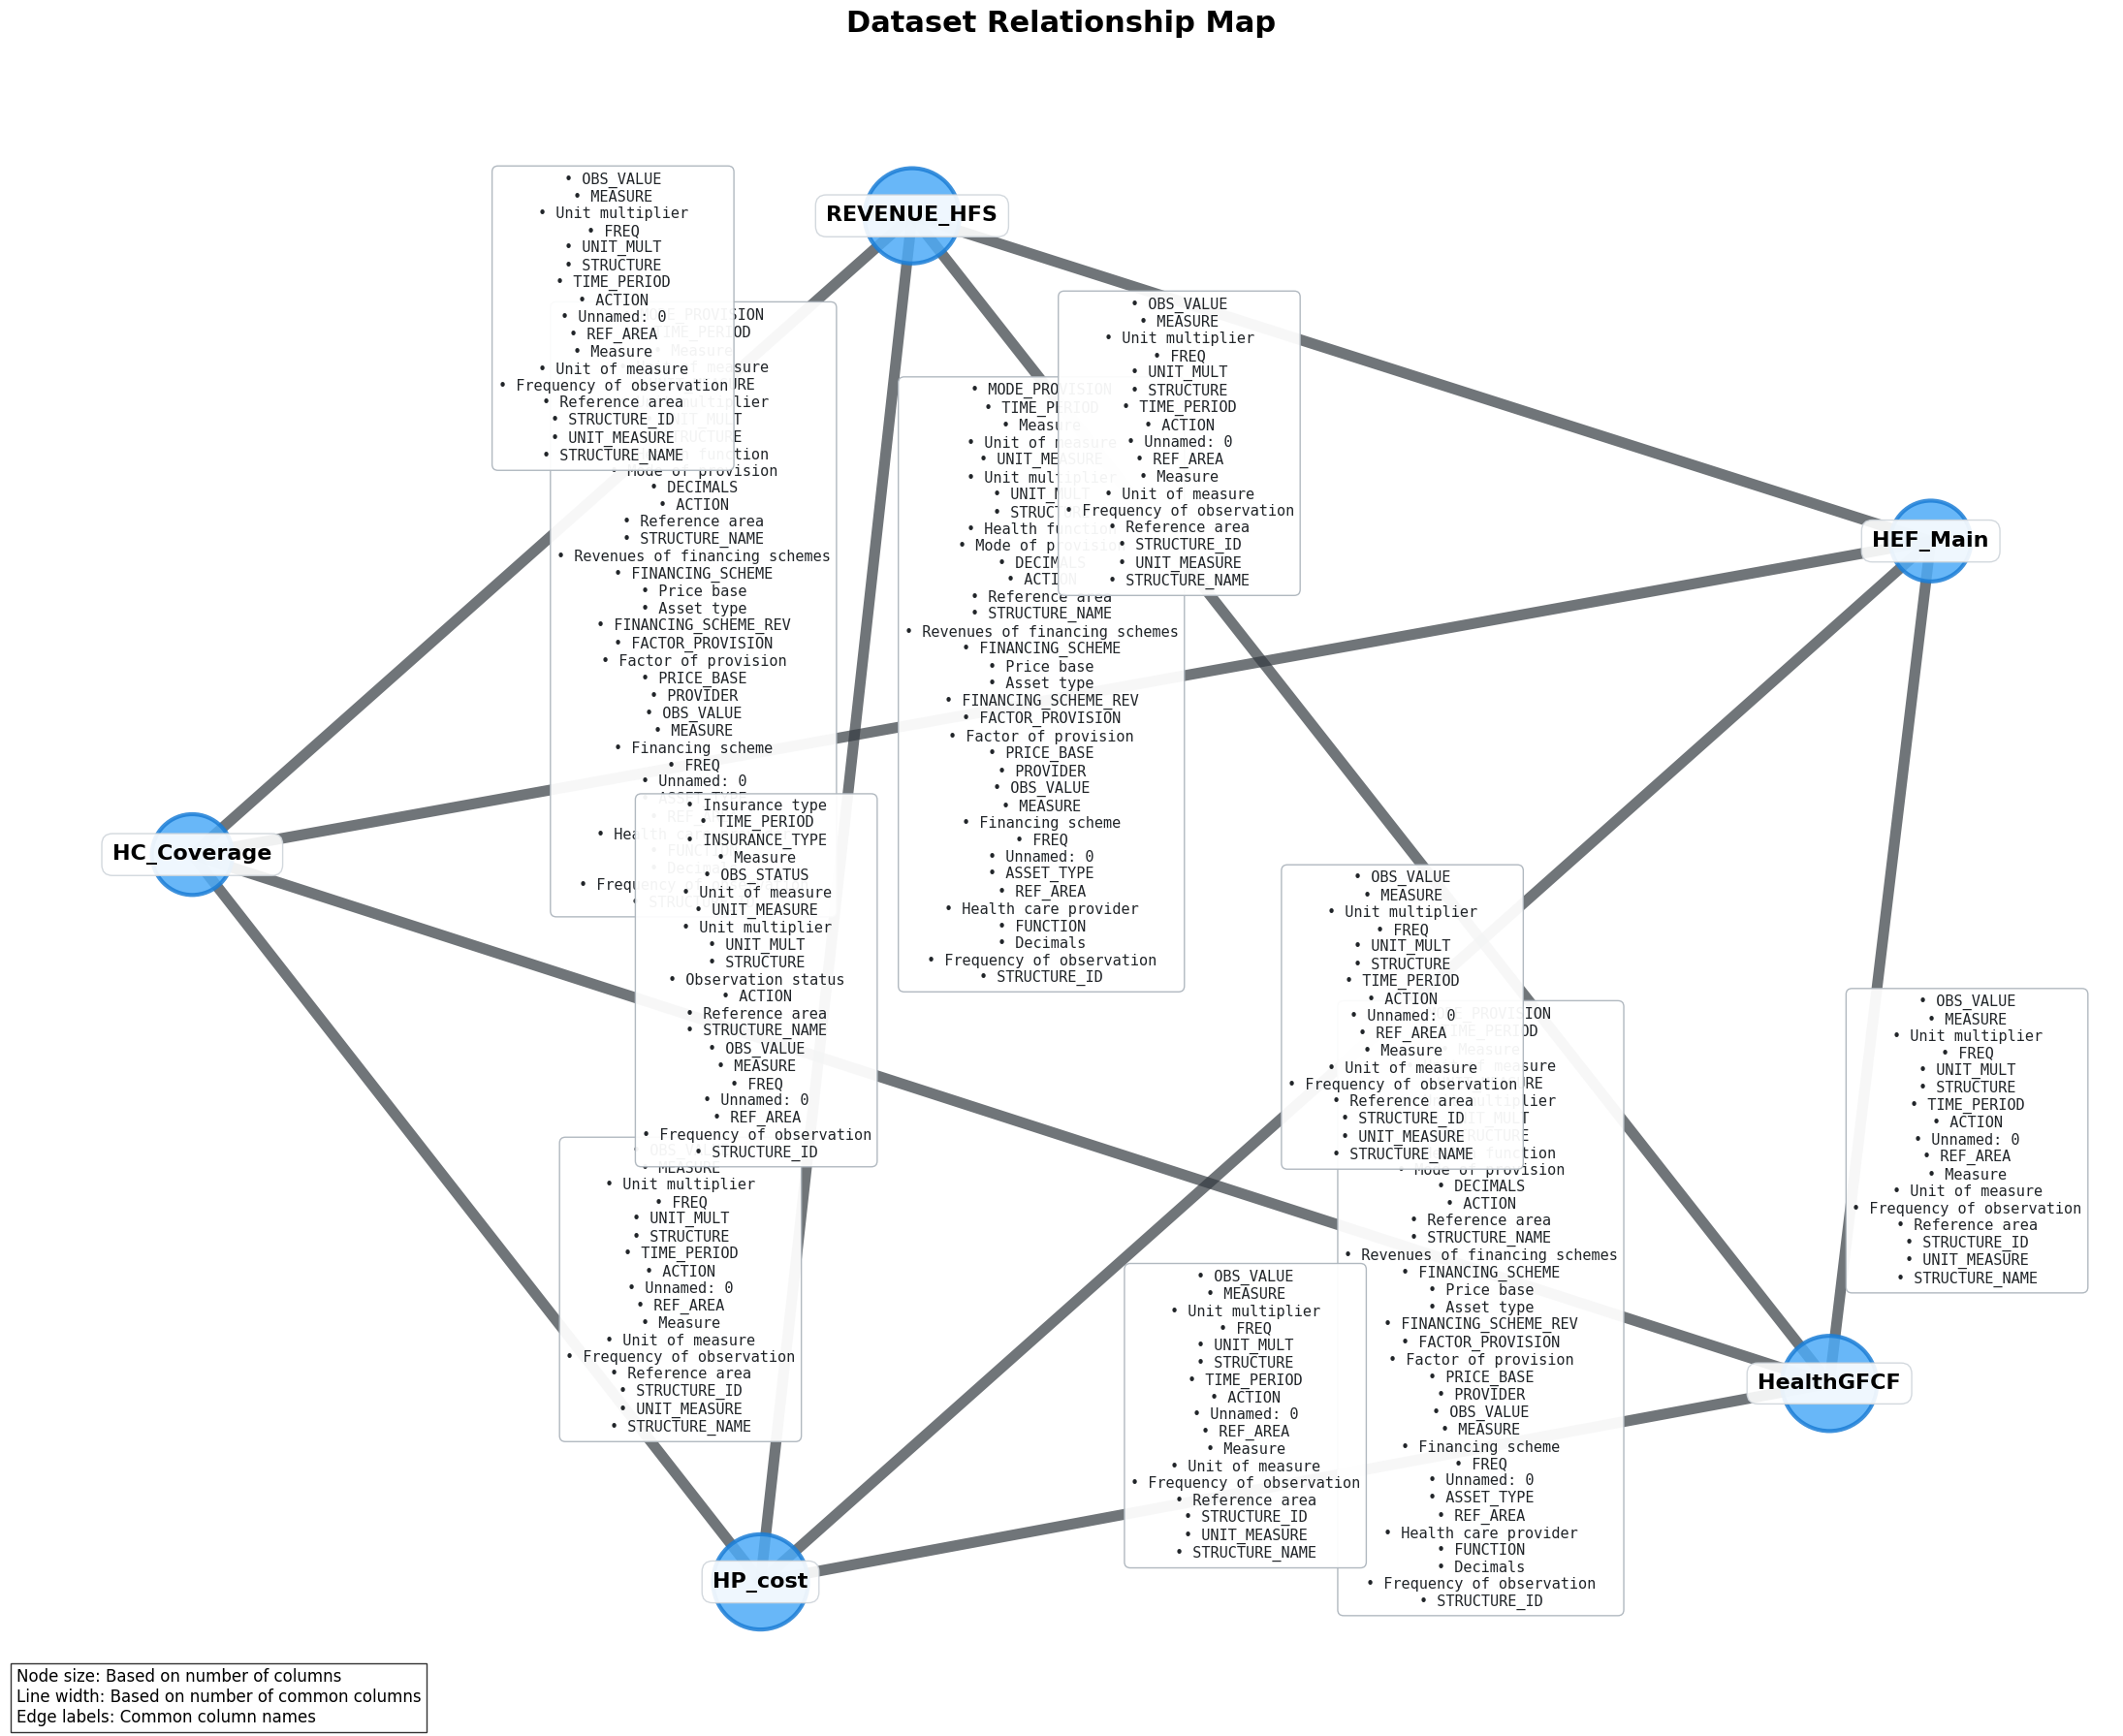

In [ ]:
import pandas as pd
import glob
import os
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def analyze_relationships(csv_dir, output_dir, plot=True):
    os.makedirs(output_dir, exist_ok=True)
    
    # Load datasets
    dataframes = {}
    csv_files = glob.glob(os.path.join(csv_dir, '*.csv'))
    
    for file in csv_files:
        df_name = os.path.splitext(os.path.basename(file))[0]
        try:
            dataframes[df_name] = pd.read_csv(file)
            print(f"Loaded: {df_name} ({dataframes[df_name].shape[0]} rows, {dataframes[df_name].shape[1]} columns)")
        except Exception as e:
            print(f"Error loading {df_name}: {e}")
    
    # Find relationships
    common_columns = {}
    for df1, df2 in combinations(dataframes.keys(), 2):
        common = list(set(dataframes[df1].columns) & set(dataframes[df2].columns))
        if common:
            common_columns[(df1, df2)] = common
            print(f"\nRelationship: {df1} <-> {df2}")
            print(f"Common columns: {common}")
            
            # Calculate value matches
            for col in common:
                vals1 = set(dataframes[df1][col].dropna().astype(str))
                vals2 = set(dataframes[df2][col].dropna().astype(str))
                
                if vals1:
                    match_pct = len(vals1 & vals2)/len(vals1)*100
                    print(f"  - {col}: {match_pct:.1f}% match ({len(vals1 & vals2)} values)")

    # Create network graph
    G = nx.Graph()
    
    # Add nodes with metadata
    for df_name, df in dataframes.items():
        G.add_node(df_name, 
                  cols=df.columns.tolist(),
                  rows=len(df),
                  size=len(df.columns)*100 + 1500)  # Slightly larger base size
    
    # Add edges with relationships
    for (df1, df2), cols in common_columns.items():
        # Format column list with bullets for better readability
        label = "\n".join([f"• {c}" for c in cols])
        G.add_edge(df1, df2, 
                  weight=min(len(cols)*1.5, 8),  # Cap maximum width
                  label=label,
                  num_cols=len(cols))  # Store for reference
    
    # Visualization with improvements
    if plot:
        plt.figure(figsize=(22, 18))  # Larger figure for more space
        
        # Use spring layout with more space between nodes
        pos = nx.spring_layout(G, k=0.7, iterations=100, seed=42)
        
        # Identify which edges should be curved (those with more columns or connecting high-degree nodes)
        straight_edges = []
        curved_edges = []
        for u, v in G.edges():
            if G.degree(u) > 2 or G.degree(v) > 2 or G[u][v]['num_cols'] > 5:
                curved_edges.append((u, v))
            else:
                straight_edges.append((u, v))
        
        # Node styling
        nx.draw_networkx_nodes(G, pos,
                              node_size=[G.nodes[n]['size'] for n in G.nodes],
                              node_color="#4dabf7",  # Brighter blue
                              alpha=0.85,
                              edgecolors="#1c7ed6",
                              linewidths=3)
        
        # Draw straight edges
        nx.draw_networkx_edges(G, pos,
                              edgelist=straight_edges,
                              width=[G[u][v]['weight'] for u, v in straight_edges],
                              alpha=0.7,
                              edge_color="#343a40")
        
        # Draw curved edges
        arc_rad = 0.3  # Curve strength
        nx.draw_networkx_edges(G, pos,
                              edgelist=curved_edges,
                              width=[G[u][v]['weight'] for u, v in curved_edges],
                              alpha=0.7,
                              edge_color="#343a40",
                              connectionstyle=f'arc3,rad={arc_rad}')
        
        # Node labels with better visibility
        nx.draw_networkx_labels(G, pos,
                               font_size=16,  # Larger text
                               font_weight='bold',
                               font_color='#000000',
                               bbox=dict(facecolor='white', 
                                        alpha=0.9,
                                        edgecolor='#ced4da',
                                        boxstyle='round,pad=0.5'))
        
        # Edge labels for straight edges
        straight_edge_labels = {(u, v): G[u][v]['label'] for u, v in straight_edges}
        nx.draw_networkx_edge_labels(G, pos,
                                    edge_labels=straight_edge_labels,
                                    font_size=11,  # Larger font
                                    font_family='monospace',  # Better for column lists
                                    font_color='#212529',
                                    bbox=dict(facecolor='white', 
                                             alpha=0.95,  # More opaque
                                             edgecolor='#adb5bd',  # Visible border
                                             boxstyle='round,pad=0.4'),  # More padding
                                    rotate=False)
        
        # Edge labels for curved edges (different position)
        curved_edge_labels = {(u, v): G[u][v]['label'] for u, v in curved_edges}
        nx.draw_networkx_edge_labels(G, pos,
                                    edge_labels=curved_edge_labels,
                                    font_size=11,
                                    font_family='monospace',
                                    font_color='#212529',
                                    bbox=dict(facecolor='white', 
                                             alpha=0.95,
                                             edgecolor='#adb5bd',
                                             boxstyle='round,pad=0.4'),
                                    rotate=False,
                                    label_pos=0.3,  # Position adjusted for curved edges
                                    connectionstyle=f'arc3,rad={arc_rad}')
        
        # Add a legend
        plt.figtext(0.01, 0.01, 
                   "Node size: Based on number of columns\nLine width: Based on number of common columns\nEdge labels: Common column names",
                   ha='left', 
                   fontsize=12, 
                   bbox=dict(facecolor='white', alpha=0.8))
        
        plt.title("Dataset Relationship Map", fontsize=22, pad=30, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        
        # Save to specified output directory
        output_path = os.path.join(output_dir, 'new_dataset_relationship_diagram.png')
        plt.savefig(output_path, dpi=600, bbox_inches='tight')  # Higher DPI for clarity
        print(f"Relationship diagram saved to: {output_path}")
        
        plt.show()

    return dataframes, common_columns, G

# Usage example with specified output directory
dataframes, common_cols, relationship_graph = analyze_relationships(
    csv_dir='/Users/vidushi/Documents/Datasets/DW/cleaned',
    output_dir='/Users/vidushi/Documents/Datasets/DW/output',
    plot=True
)


# tech design

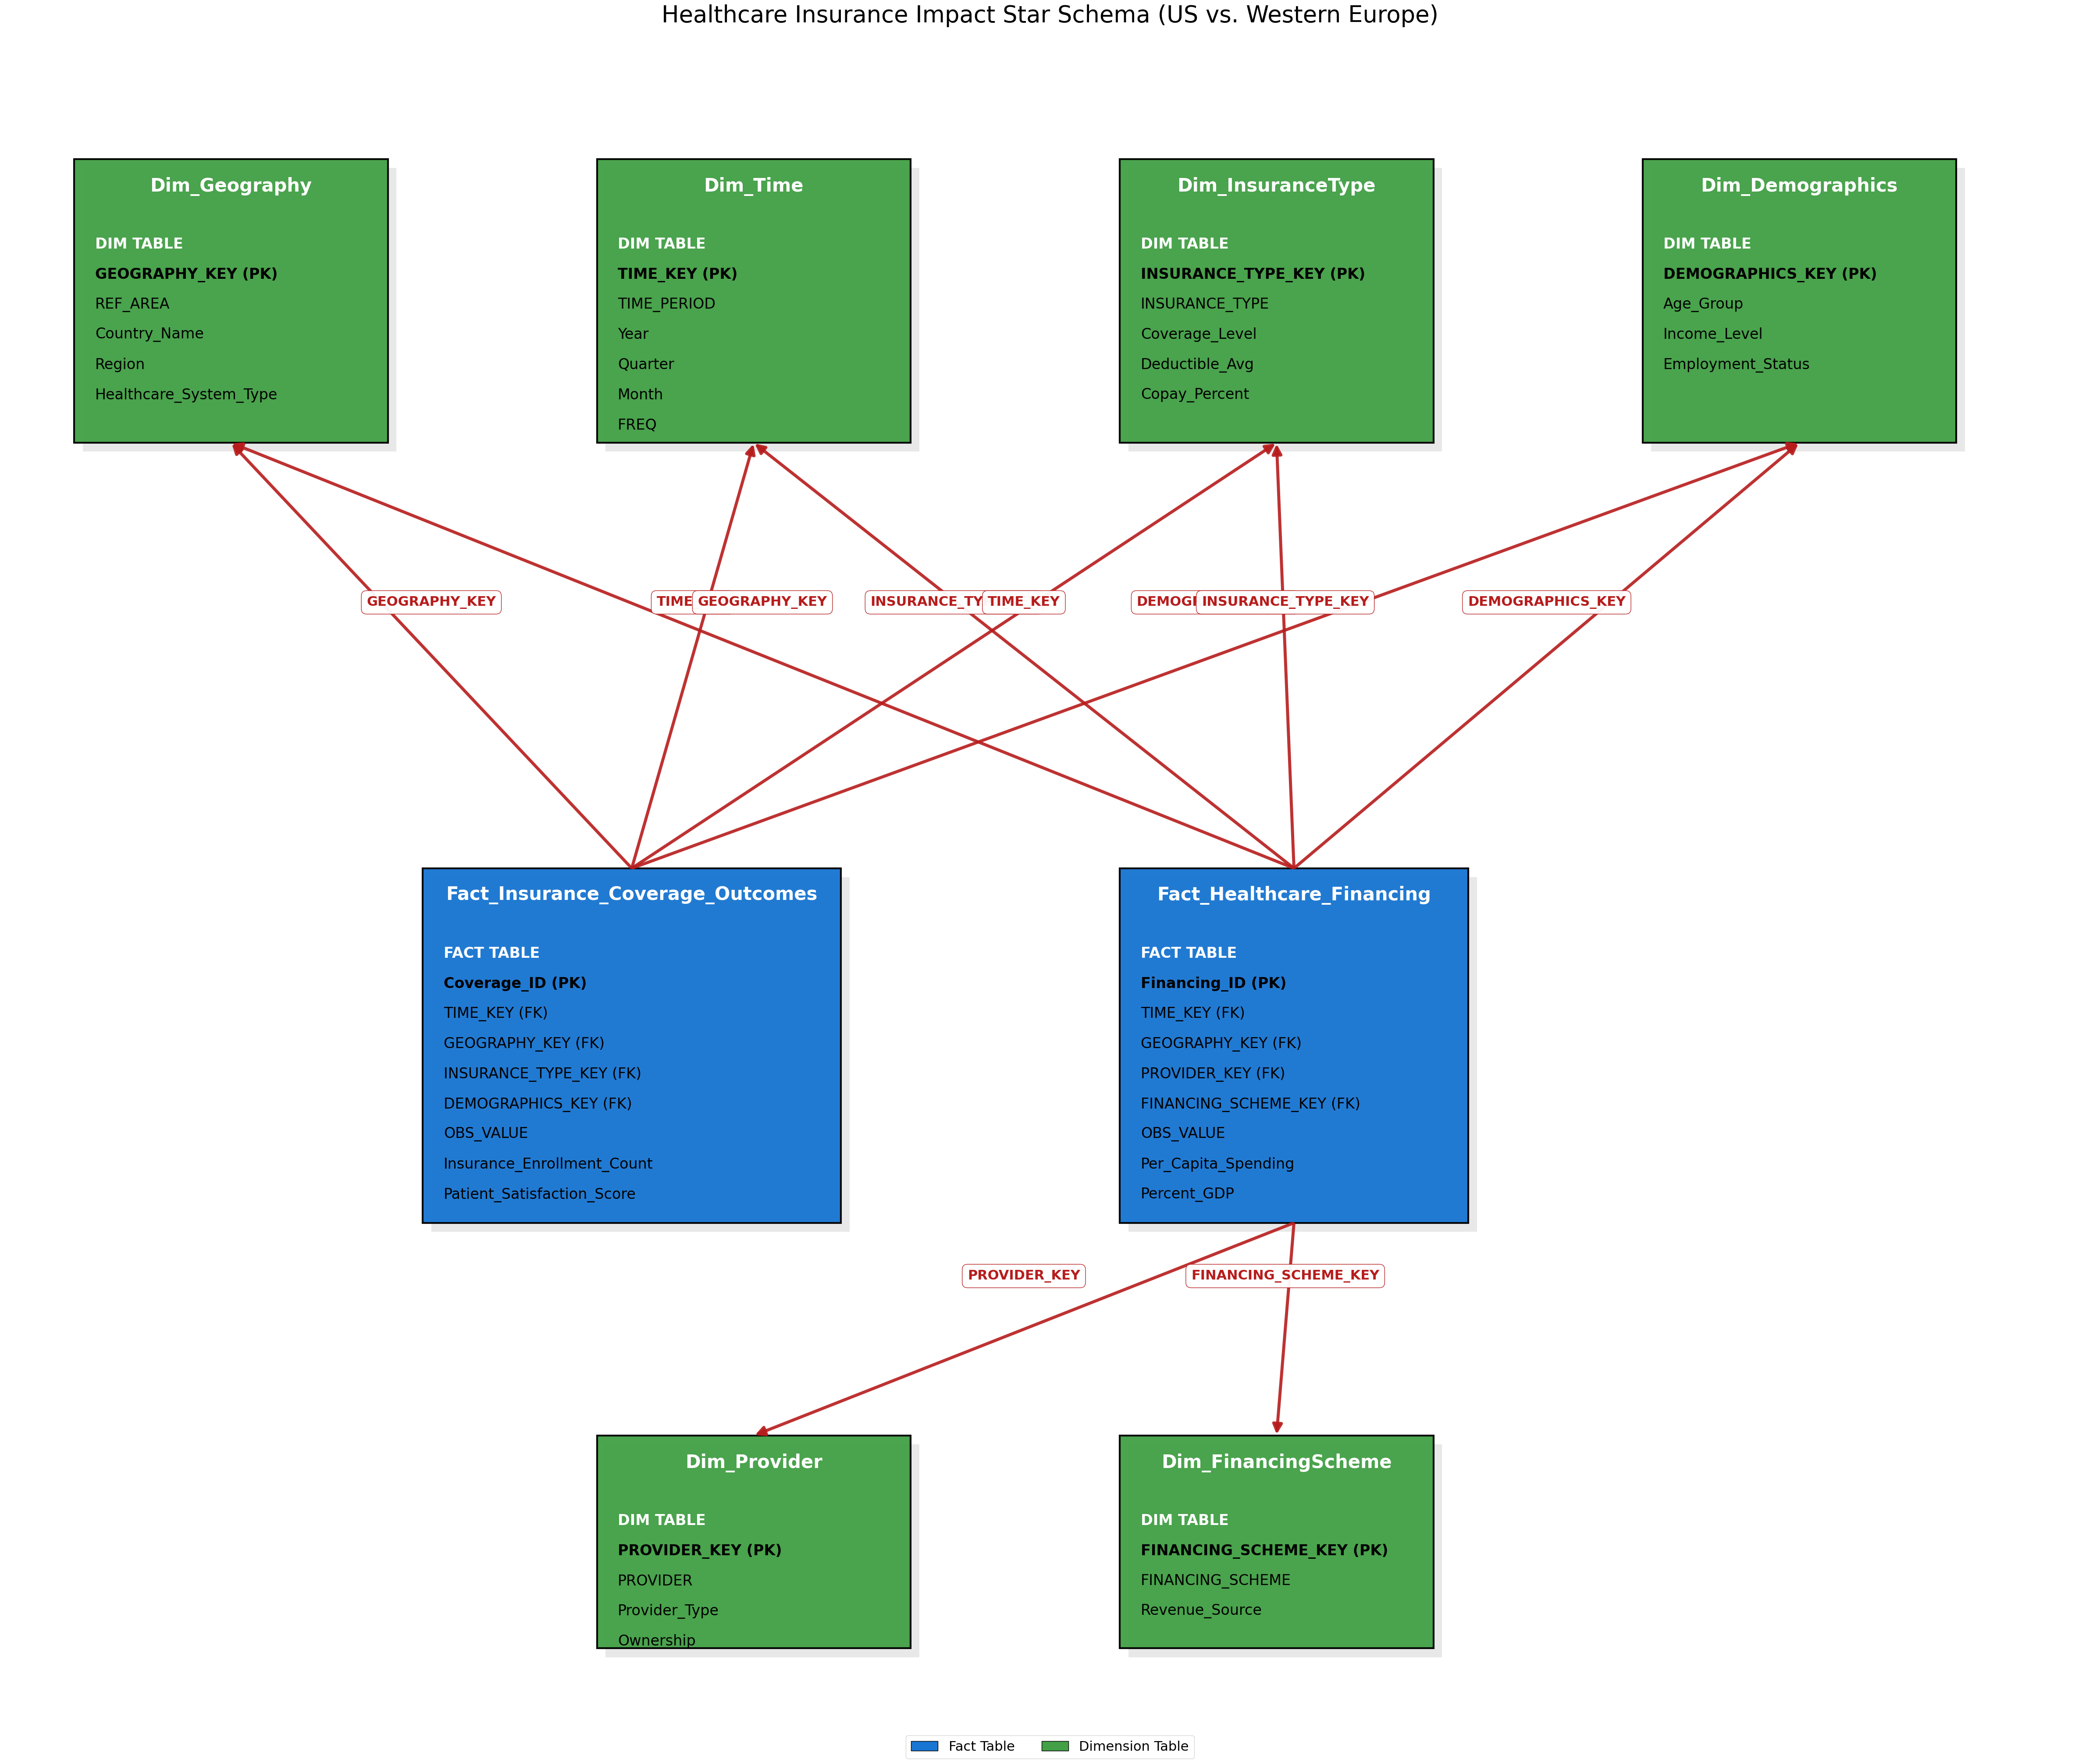

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch, Patch

tables = {
    "Fact_Insurance_Coverage_Outcomes": [
        "FACT TABLE",
        "Coverage_ID (PK)",
        "TIME_KEY (FK)",
        "GEOGRAPHY_KEY (FK)",
        "INSURANCE_TYPE_KEY (FK)",
        "DEMOGRAPHICS_KEY (FK)",
        "OBS_VALUE",
        "Insurance_Enrollment_Count",
        "Patient_Satisfaction_Score"
    ],
    "Fact_Healthcare_Financing": [
        "FACT TABLE",
        "Financing_ID (PK)",
        "TIME_KEY (FK)",
        "GEOGRAPHY_KEY (FK)",
        "PROVIDER_KEY (FK)",
        "FINANCING_SCHEME_KEY (FK)",
        "OBS_VALUE",
        "Per_Capita_Spending",
        "Percent_GDP"
    ],
    "Dim_Geography": [
        "DIM TABLE",
        "GEOGRAPHY_KEY (PK)",
        "REF_AREA",
        "Country_Name",
        "Region",
        "Healthcare_System_Type"
    ],
    "Dim_Time": [
        "DIM TABLE",
        "TIME_KEY (PK)",
        "TIME_PERIOD",
        "Year",
        "Quarter",
        "Month",
        "FREQ"
    ],
    "Dim_InsuranceType": [
        "DIM TABLE",
        "INSURANCE_TYPE_KEY (PK)",
        "INSURANCE_TYPE",
        "Coverage_Level",
        "Deductible_Avg",
        "Copay_Percent"
    ],
    "Dim_Demographics": [
        "DIM TABLE",
        "DEMOGRAPHICS_KEY (PK)",
        "Age_Group",
        "Income_Level",
        "Employment_Status"
    ],
    "Dim_Provider": [
        "DIM TABLE",
        "PROVIDER_KEY (PK)",
        "PROVIDER",
        "Provider_Type",
        "Ownership"
    ],
    "Dim_FinancingScheme": [
        "DIM TABLE",
        "FINANCING_SCHEME_KEY (PK)",
        "FINANCING_SCHEME",
        "Revenue_Source"
    ]
}

# Positions with INCREASED DISTANCE between top dimension tables and fact tables
# Changed y-coordinates for top dimension tables from 25 to 35
positions = {
    "Fact_Insurance_Coverage_Outcomes": (10, 13, 12, 10),
    "Fact_Healthcare_Financing": (30, 13, 10, 10),
    # Top dimension tables - increased y from 25 to 35
    "Dim_Geography": (0, 35, 9, 8),
    "Dim_Time": (15, 35, 9, 8),
    "Dim_InsuranceType": (30, 35, 9, 8),
    "Dim_Demographics": (45, 35, 9, 8),
    # Bottom dimension tables - unchanged
    "Dim_Provider": (15, 1, 9, 6),
    "Dim_FinancingScheme": (30, 1, 9, 6),
}

# Increased the vertical space in the figure (ylim from 34 to 46)
fig, ax = plt.subplots(figsize=(48, 40))  # Increased height from 32 to 40
ax.set_xlim(-2, 58)
ax.set_ylim(0, 46)  # Increased from 34 to 46
ax.axis('off')

# Draw rectangles and columns
for table, (x, y, w, h) in positions.items():
    color = '#1976d2' if 'Fact' in table else '#43a047'
    edgecolor = 'black'
    ax.add_patch(Rectangle((x+0.25, y-0.25), w, h, linewidth=0, facecolor='gray', alpha=0.18, zorder=1))
    ax.add_patch(Rectangle((x, y), w, h, linewidth=3, edgecolor=edgecolor, facecolor=color, alpha=0.96, zorder=2))
    ax.text(x + w/2, y + h - 0.5, table, ha='center', va='top', fontsize=30, fontweight='bold', color='white', zorder=3)
    for i, col in enumerate(tables[table]):
        ax.text(x + 0.6, y + h - 2.2 - i*0.85, col, ha='left', va='top', fontsize=24, color='white' if i == 0 else 'black', fontweight='bold' if i <= 1 else 'normal', zorder=3)

# Draw straight arrows with FK labels above
def draw_arrow(from_table, to_table, fk_label):
    x1, y1, w1, h1 = positions[from_table]
    x2, y2, w2, h2 = positions[to_table]
    # Start from center of bottom of fact, end at center of top of dimension
    start = (x1 + w1/2, y1 + h1)
    end = (x2 + w2/2, y2)
    if y2 < y1:  # For bottom dimensions, flip direction
        start = (x1 + w1/2, y1)
        end = (x2 + w2/2, y2 + h2)
    # Draw arrow
    arrow_patch = FancyArrowPatch(start, end, connectionstyle="arc3,rad=0", arrowstyle='-|>', color='#b71c1c', lw=5, alpha=0.9, mutation_scale=32, zorder=4)
    ax.add_patch(arrow_patch)
    # FK label above arrow - position adjusted for longer arrows
    mx, my = (start[0] + end[0])/2, (start[1] + end[1])/2 + 1.5  # Increased label offset from 1.2 to 1.5
    ax.text(mx, my, fk_label, fontsize=22, color='#b71c1c', fontweight='bold', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.95, edgecolor='#b71c1c', boxstyle='round,pad=0.4'), zorder=5)

# Fact_Insurance_Coverage_Outcomes relationships (top)
draw_arrow("Fact_Insurance_Coverage_Outcomes", "Dim_Geography", "GEOGRAPHY_KEY")
draw_arrow("Fact_Insurance_Coverage_Outcomes", "Dim_Time", "TIME_KEY")
draw_arrow("Fact_Insurance_Coverage_Outcomes", "Dim_InsuranceType", "INSURANCE_TYPE_KEY")
draw_arrow("Fact_Insurance_Coverage_Outcomes", "Dim_Demographics", "DEMOGRAPHICS_KEY")
# Fact_Healthcare_Financing relationships (top)
draw_arrow("Fact_Healthcare_Financing", "Dim_InsuranceType", "INSURANCE_TYPE_KEY")
draw_arrow("Fact_Healthcare_Financing", "Dim_Demographics", "DEMOGRAPHICS_KEY")
draw_arrow("Fact_Healthcare_Financing", "Dim_Geography", "GEOGRAPHY_KEY")
draw_arrow("Fact_Healthcare_Financing", "Dim_Time", "TIME_KEY")
# Fact_Healthcare_Financing relationships (bottom)
draw_arrow("Fact_Healthcare_Financing", "Dim_Provider", "PROVIDER_KEY")
draw_arrow("Fact_Healthcare_Financing", "Dim_FinancingScheme", "FINANCING_SCHEME_KEY")

# Add legend
legend_elements = [
    Patch(facecolor='#1976d2', edgecolor='k', label='Fact Table'),
    Patch(facecolor='#43a047', edgecolor='k', label='Dimension Table'),
]
plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=22, frameon=True)
plt.title("Healthcare Insurance Impact Star Schema (US vs. Western Europe)", fontsize=38, pad=50)
plt.tight_layout()
plt.show()


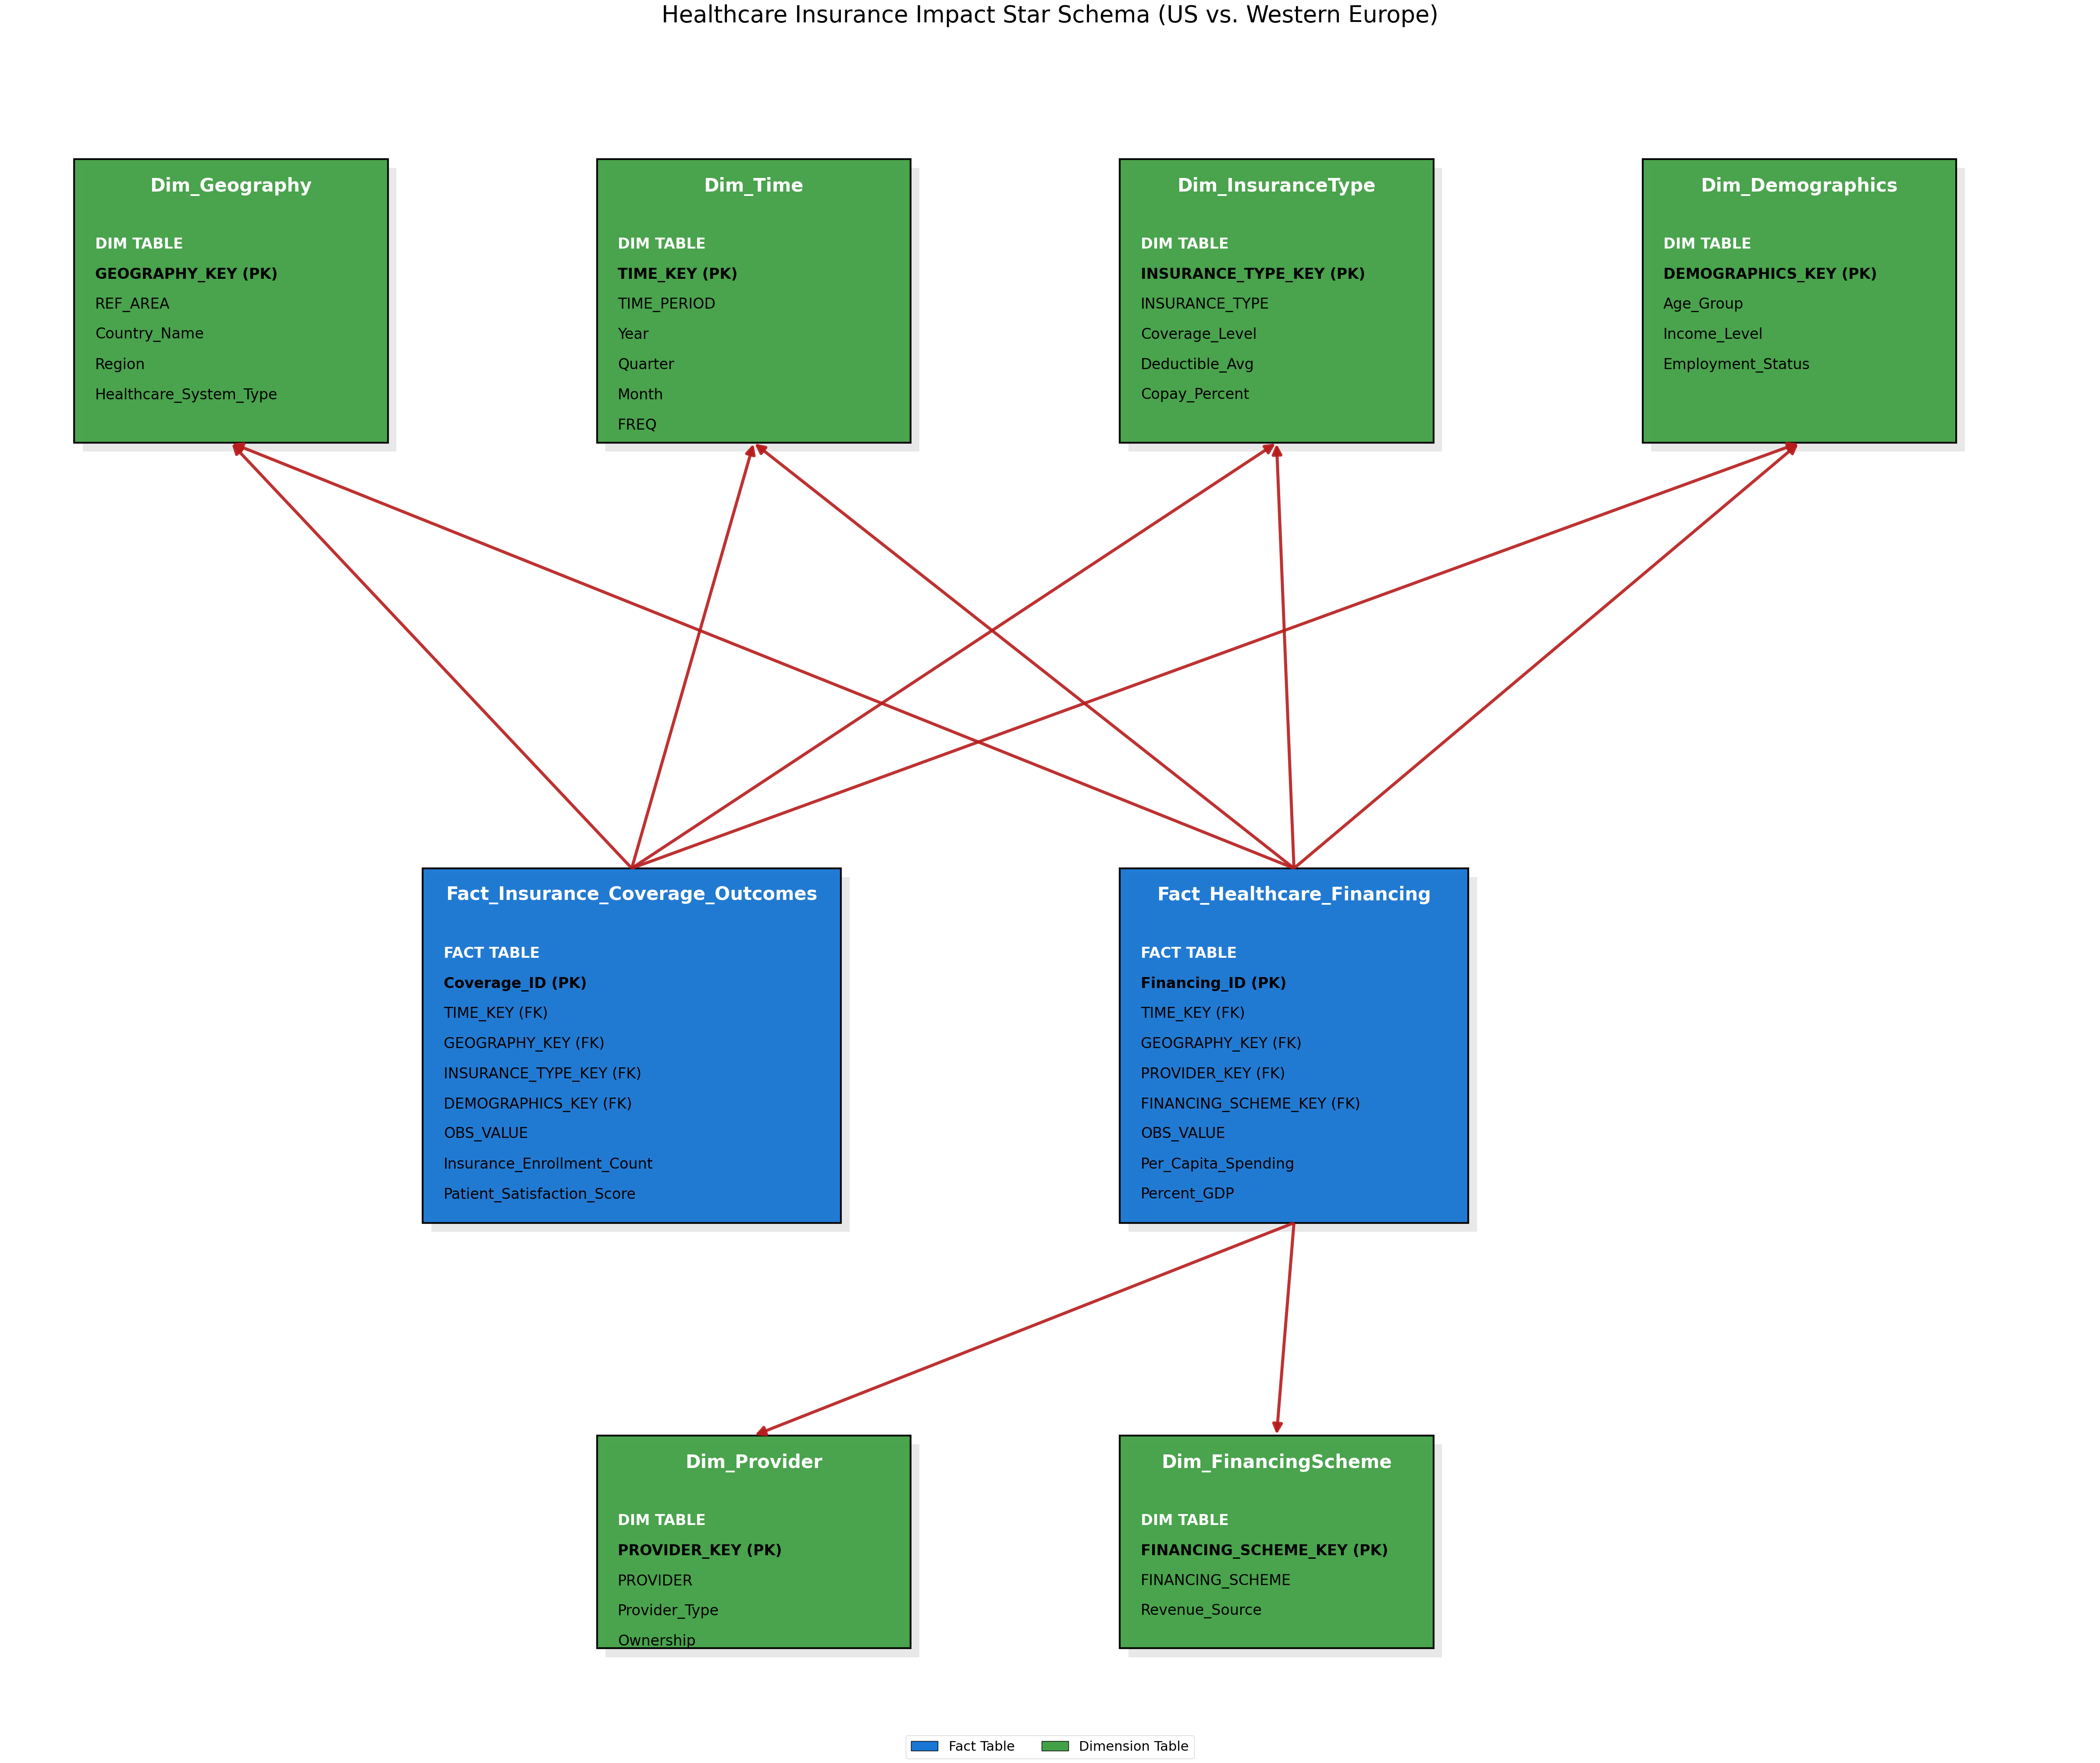

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch, Patch

tables = {
    "Fact_Insurance_Coverage_Outcomes": [
        "FACT TABLE",
        "Coverage_ID (PK)",
        "TIME_KEY (FK)",
        "GEOGRAPHY_KEY (FK)",
        "INSURANCE_TYPE_KEY (FK)",
        "DEMOGRAPHICS_KEY (FK)",
        "OBS_VALUE",
        "Insurance_Enrollment_Count",
        "Patient_Satisfaction_Score"
    ],
    "Fact_Healthcare_Financing": [
        "FACT TABLE",
        "Financing_ID (PK)",
        "TIME_KEY (FK)",
        "GEOGRAPHY_KEY (FK)",
        "PROVIDER_KEY (FK)",
        "FINANCING_SCHEME_KEY (FK)",
        "OBS_VALUE",
        "Per_Capita_Spending",
        "Percent_GDP"
    ],
    "Dim_Geography": [
        "DIM TABLE",
        "GEOGRAPHY_KEY (PK)",
        "REF_AREA",
        "Country_Name",
        "Region",
        "Healthcare_System_Type"
    ],
    "Dim_Time": [
        "DIM TABLE",
        "TIME_KEY (PK)",
        "TIME_PERIOD",
        "Year",
        "Quarter",
        "Month",
        "FREQ"
    ],
    "Dim_InsuranceType": [
        "DIM TABLE",
        "INSURANCE_TYPE_KEY (PK)",
        "INSURANCE_TYPE",
        "Coverage_Level",
        "Deductible_Avg",
        "Copay_Percent"
    ],
    "Dim_Demographics": [
        "DIM TABLE",
        "DEMOGRAPHICS_KEY (PK)",
        "Age_Group",
        "Income_Level",
        "Employment_Status"
    ],
    "Dim_Provider": [
        "DIM TABLE",
        "PROVIDER_KEY (PK)",
        "PROVIDER",
        "Provider_Type",
        "Ownership"
    ],
    "Dim_FinancingScheme": [
        "DIM TABLE",
        "FINANCING_SCHEME_KEY (PK)",
        "FINANCING_SCHEME",
        "Revenue_Source"
    ]
}

positions = {
    "Fact_Insurance_Coverage_Outcomes": (10, 13, 12, 10),
    "Fact_Healthcare_Financing": (30, 13, 10, 10),
    "Dim_Geography": (0, 35, 9, 8),
    "Dim_Time": (15, 35, 9, 8),
    "Dim_InsuranceType": (30, 35, 9, 8),
    "Dim_Demographics": (45, 35, 9, 8),
    "Dim_Provider": (15, 1, 9, 6),
    "Dim_FinancingScheme": (30, 1, 9, 6),
}

fig, ax = plt.subplots(figsize=(48, 40))
ax.set_xlim(-2, 58)
ax.set_ylim(0, 46)
ax.axis('off')

# Draw rectangles and columns
for table, (x, y, w, h) in positions.items():
    color = '#1976d2' if 'Fact' in table else '#43a047'
    edgecolor = 'black'
    ax.add_patch(Rectangle((x+0.25, y-0.25), w, h, linewidth=0, facecolor='gray', alpha=0.18, zorder=1))
    ax.add_patch(Rectangle((x, y), w, h, linewidth=3, edgecolor=edgecolor, facecolor=color, alpha=0.96, zorder=2))
    ax.text(x + w/2, y + h - 0.5, table, ha='center', va='top', fontsize=30, fontweight='bold', color='white', zorder=3)
    for i, col in enumerate(tables[table]):
        ax.text(x + 0.6, y + h - 2.2 - i*0.85, col, ha='left', va='top', fontsize=24, color='white' if i == 0 else 'black', fontweight='bold' if i <= 1 else 'normal', zorder=3)

# Draw arrows (no FK label in middle)
def draw_arrow(from_table, to_table):
    x1, y1, w1, h1 = positions[from_table]
    x2, y2, w2, h2 = positions[to_table]
    start = (x1 + w1/2, y1 + h1)
    end = (x2 + w2/2, y2)
    if y2 < y1:
        start = (x1 + w1/2, y1)
        end = (x2 + w2/2, y2 + h2)
    arrow_patch = FancyArrowPatch(start, end, connectionstyle="arc3,rad=0", arrowstyle='-|>', color='#b71c1c', lw=5, alpha=0.9, mutation_scale=32, zorder=4)
    ax.add_patch(arrow_patch)

# Top dimension FKs (left for left fact, right for right fact)
def fk_label_below_dim(dim_table, fk_label, align='left'):
    x, y, w, h = positions[dim_table]
    if align == 'left':
        ax.text(x + 0.7, y - 1.1, fk_label, ha='left', va='top', fontsize=22, color='#b71c1c', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.95, edgecolor='#b71c1c', boxstyle='round,pad=0.4'), zorder=5)
    elif align == 'right':
        ax.text(x + w - 0.7, y - 1.1, fk_label, ha='right', va='top', fontsize=22, color='#b71c1c', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.95, edgecolor='#b71c1c', boxstyle='round,pad=0.4'), zorder=5)

# Draw top arrows and FK labels
draw_arrow("Fact_Insurance_Coverage_Outcomes", "Dim_Geography")
draw_arrow("Fact_Insurance_Coverage_Outcomes", "Dim_Time")
draw_arrow("Fact_Insurance_Coverage_Outcomes", "Dim_InsuranceType")
draw_arrow("Fact_Insurance_Coverage_Outcomes", "Dim_Demographics")
draw_arrow("Fact_Healthcare_Financing", "Dim_InsuranceType")
draw_arrow("Fact_Healthcare_Financing", "Dim_Demographics")
draw_arrow("Fact_Healthcare_Financing", "Dim_Geography")
draw_arrow("Fact_Healthcare_Financing", "Dim_Time")
draw_arrow("Fact_Healthcare_Financing", "Dim_Provider")
draw_arrow("Fact_Healthcare_Financing", "Dim_FinancingScheme")

legend_elements = [
    Patch(facecolor='#1976d2', edgecolor='k', label='Fact Table'),
    Patch(facecolor='#43a047', edgecolor='k', label='Dimension Table'),
]
plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=22, frameon=True)
plt.title("Healthcare Insurance Impact Star Schema (US vs. Western Europe)", fontsize=38, pad=50)
plt.tight_layout()

plt.show()
